Importing the libraries

# Task 2: Calculating Bias and Variance
In this question you are going to calculate the bias and variance of your trained model.

In [9]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from scipy.integrate import quad
from sklearn.neighbors import KernelDensity
import pandas as pd

In [10]:
MAX_DEGREE = 20
NUMBER_OF_PARTS = 10
model_complexity = range(1, MAX_DEGREE + 1)

In [11]:
# X_train, X_test, y_train, y_test 
train, test = None, None
with open('data/train.pkl', 'rb') as f:
    train = pickle.load(f)
with open('data/test.pkl', 'rb') as f:
    test = pickle.load(f)
    
# randomly shuffle the data
np.random.shuffle(train)

# divide data into parts 
train_set = np.array_split(train, NUMBER_OF_PARTS)

In [12]:
def get_xy(data):
    """
    Splits data into x and y pairs
    and returns numpy array after reshaping
    """
    X, y = [], []
    for point in data:
        X.append(point[0])
        y.append(point[1])
    
    #convert to numpy array
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    
    # Reshape X and y
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return X, y

In [13]:
bias_list = []
variance_list = []
mse_list = []

X_test, y_test = get_xy(test)

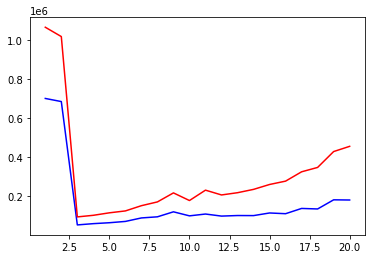

In [14]:
# loop through the degrees
for deg in range(1, MAX_DEGREE +1):
    
#     predictions = []
    bias_deg_list = []
    mse_deg_list = []
    var_list = []
    for part in range(0, NUMBER_OF_PARTS):
        
        # get training data for  model
        X_train, y_train = get_xy(train_set[part])

        # create model and fit on data
        reg = make_pipeline(PolynomialFeatures(deg), LinearRegression()) 
        reg.fit(X_train, y_train)

        # store predictions of model
        y_pred = reg.predict(X_test)
#         predictions.append(y_pred)

        # store bias
        bias = abs(y_pred - y_test)
        bias_deg_list.append(bias)

        mse = mean_squared_error(y_test, y_pred)
        mse_deg_list.append(mse)
        
        variance = np.mean(y_pred**2) - (np.mean(y_pred))**2
        var_list.append(variance)
    mse = np.mean(mse_deg_list)    
    mse_list.append(mse)
    
    bias = np.mean(bias_deg_list)
    bias_list.append(bias**2)
    
    # diff = (f` - E[f'])
#     diff_2 = np.square(diff**2)
    variance = np.mean(var_list)
    variance_list.append(variance)
    
plt.plot(model_complexity, bias_list, c="b", label="bias_2") 
# plt.plot(model_complexity, variance_list, c="k", label="variance")   
plt.plot(model_complexity, mse_list, c="r", label="mse")   

In [15]:
# bias_list = np.asarray(bias_list, dtype=np.float64)
# df = pd.DataFrame({
#     'mse': mse_list, 
#     'bias': bias_list, 
#     'variance': variance_list, 
#     'irreducible error': np.subtract(
#         mse_list, 
#         np.add(
#             np.square(bias_list, bias_list),
#             variance_list
#         )
#     )
#     })
# # df.index = np.arange(1, len(df) + 1)
# # df

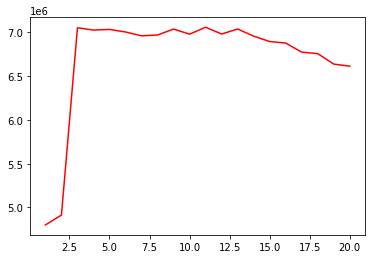

In [16]:
plt.plot(model_complexity, variance_list, c="r", label="variance")   

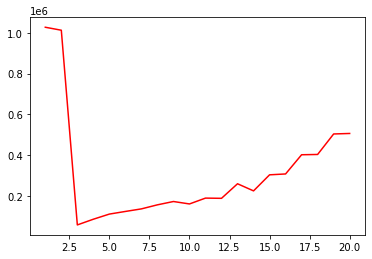

In [265]:
plt.plot(model_complexity, mse_list, c="r", label="mse")   

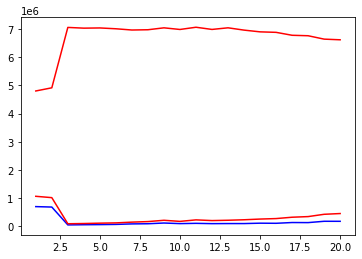

In [18]:
plt.plot(model_complexity, np.array(bias_list), c="b", label="bias_2")    
plt.plot(model_complexity, np.array(variance_list)  ,c="r", label="variance")   
plt.plot(model_complexity, np.array(mse_list) , c="r", label="mse")  

In [170]:

np.square(bias_list, bias_list)

array([2.28448859e+23, 2.18169704e+23, 5.44449522e+18, 1.09509889e+19,
       2.33281571e+19, 4.74586966e+19, 8.80621404e+19, 1.64394206e+20,
       1.86324619e+20, 1.84597395e+20, 2.48750393e+20, 2.31955878e+20,
       2.83979973e+20, 2.07743876e+20, 4.25052426e+20, 3.45733903e+20,
       8.54724719e+20, 7.77982622e+20, 2.16172453e+21, 2.21290002e+21])

In [ ]:
a = [1,2,3,4,5]
np.mean(a)